# Demonstration of tree-aut-lib usage

- this notebook exists to show basic functionality and features of the tree-aut-lib
- tree-aut-lib is a library which implements basic operations on tree automata (TA)

- for creating images, a function `convertToDOT()` is used


# Tree automaton (TA) structure - `class TTreeAut`

- each TA is initialized with 4 main elements: rootstates, transitions, name, port-arity.
    
* rootstates  ... array of states (represented by stringas)
* transitions ... dictionary referenced by names of states containing dictionaries of transitions
    - inner dictionary consists of all transitions going out of the referencing state
        * keys in the inner dictionaries are not important
    - each transition is represented by an array of 3 items:
        1.  source state
        2.  TEdge object ("hyper-edge"), eg. `TEdge("LH", [None, None], "")`, which contains:
            - symbol name,
            - array of boxes over the parts of the hyper-edge,
                * length of this array is equivalent to the arity of the symbol
                * if None, the edge is considered "Short" (no box over this edge)
            - variable (or rank).
        3.  array of children states ()
* name        ... for exporting to other formats and better readability/context
* port-arity  ... (int) number of different ports

In [13]:
from ta_classes import * 
from ta_lib import * 

from test_data import *

from format_dot import *
from format_vtf import *
from format_tmb import *

from jupyter import *

# Initializing a TA manually

- you can create a TA by manually specifying each of its attributes
- example
- more simple TA examples can be found in files `test_data.py`
- initial transition relation definitions can be found in `test_boxes.py`

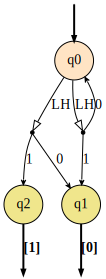

In [14]:
tempRootstates = ['q0']
tempTransitionDict = {
    "q0" : {
        "a" : ['q0', TEdge('LH', [None, None], ''), ['q1', 'q2']],
        "b" : ['q0', TEdge('LH', [None, None], ''), ['q0', 'q1']]
    },
    "q1" : {
        "c" : ['q1', TEdge('0', [], ''), []]
    },  
    "q2" : {
        "d" : ['q2', TEdge('1', [], ""), []]
    },
}

simpleTA = TTreeAut(tempRootstates, tempTransitionDict, 'A Simple TA Example')
convertToDOT(simpleTA)

# Loading a TA from a file
- alternatively, you can load a box from a file; supported formats:
    1. Timbuk file format (.tmb)
        - <https://gitlab.inria.fr/regular-pv/timbuk/timbuk/-/wikis/Specification-File-Format>
    2. VATA2 file format (.vtf)
        - <https://github.com/ondrik/automata-benchmarks/blob/master/vtf/README.md>

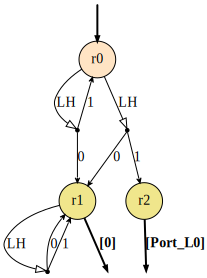

In [15]:
# Timbuk format

boxLoadedFromTMBexample = importTA("../nta/tmb/boxL0.tmb", 'tmb')
convertToDOT(boxLoadedFromTMBexample, 'a')

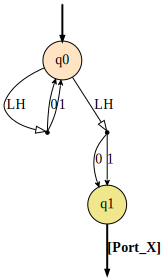

In [16]:
# VATA2 format

boxLoadedFromVTFexample = importTA("../nta/vtf/boxX.vtf", 'vtf')
convertToDOT(boxLoadedFromVTFexample, 'a')

# Tree structure - `class TTreeNode`

- the class has 4 attributes:
1. `value`    ... symbol/information stored in the node (string)
2. `parent`   ... reference to the parent node (if 'None', the node is a root)
3. `children` ... array of references to child nodes (leaves have empty array)
4. `depth`    ... useful for formatted output (indentation etc.)


- it is possible to load the trees manually by using class methods such as `addChild()`, `connectChild()` etc...

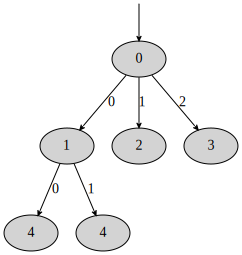

In [17]:
testTree = TTreeNode(0)
testTree.addChild(1)
testTree.addChild(2)
testTree.addChild(3)

child = testTree.children[0]
child.addChild(4)
child.addChild(4)

convertToDOT(testTree, 'n')

# String representation of a tree

- much simpler method of loading/creating a tree structure
- functions used to convert strings to trees and vice-versa are in module `test_trees.py`

- the structured 'tree' strings use three special characters `[`, `]` and `;`
    - `[` and `]` denote the start and end of children array
    - `;` is used to separate each child
    - value/name of the node should be denoted using alphanumeric characters and underscore (other characters have not been tested)
    - whitespaces are ignored
- children can then have their own child arrays, thus creating a somehow 'recursive' string
- e.g. `"a [ b ; c [ d ; e ] ]"` -> a is root, a has 2 children (b and c), c has two children (d and e)

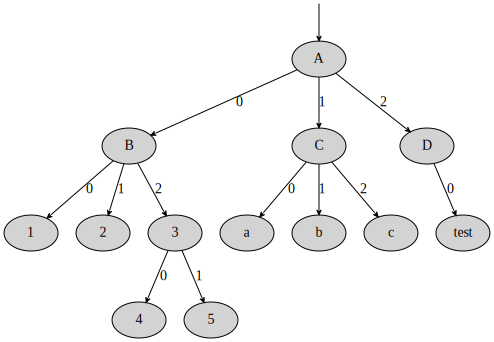

In [18]:

testTreeString = "A[ B[ 1;2;3[4;5] ] ; C[ a ; b ; c ] ; D[ test ] ]"
convertToDOT(testTreeString, 's')